0 - airplane,
1 - cars,
2 - birds ,
3 - cats ,
4 - deers ,
5 - dogs,
6 - frogs ,
7 - horses ,
8 - ships,
9 - trucks


In [43]:
class_names = ['airplane','automobile','birds','cats','deers','dogs','frogs','horses','ships','trucks']

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [32]:
from keras.datasets import cifar10 
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [33]:
x_train.shape

(50000, 32, 32, 3)

Data Visualisation

[0]


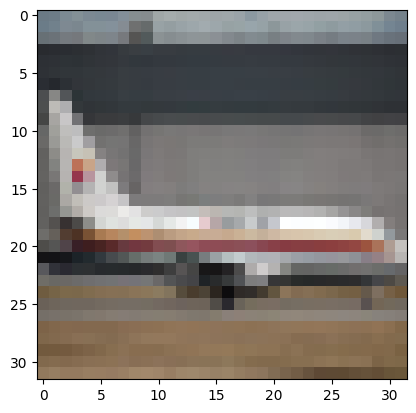

In [34]:
import random as rnd
i = rnd.randint(0,50000)
plt.imshow(x_train[i])
print(y_train[i])

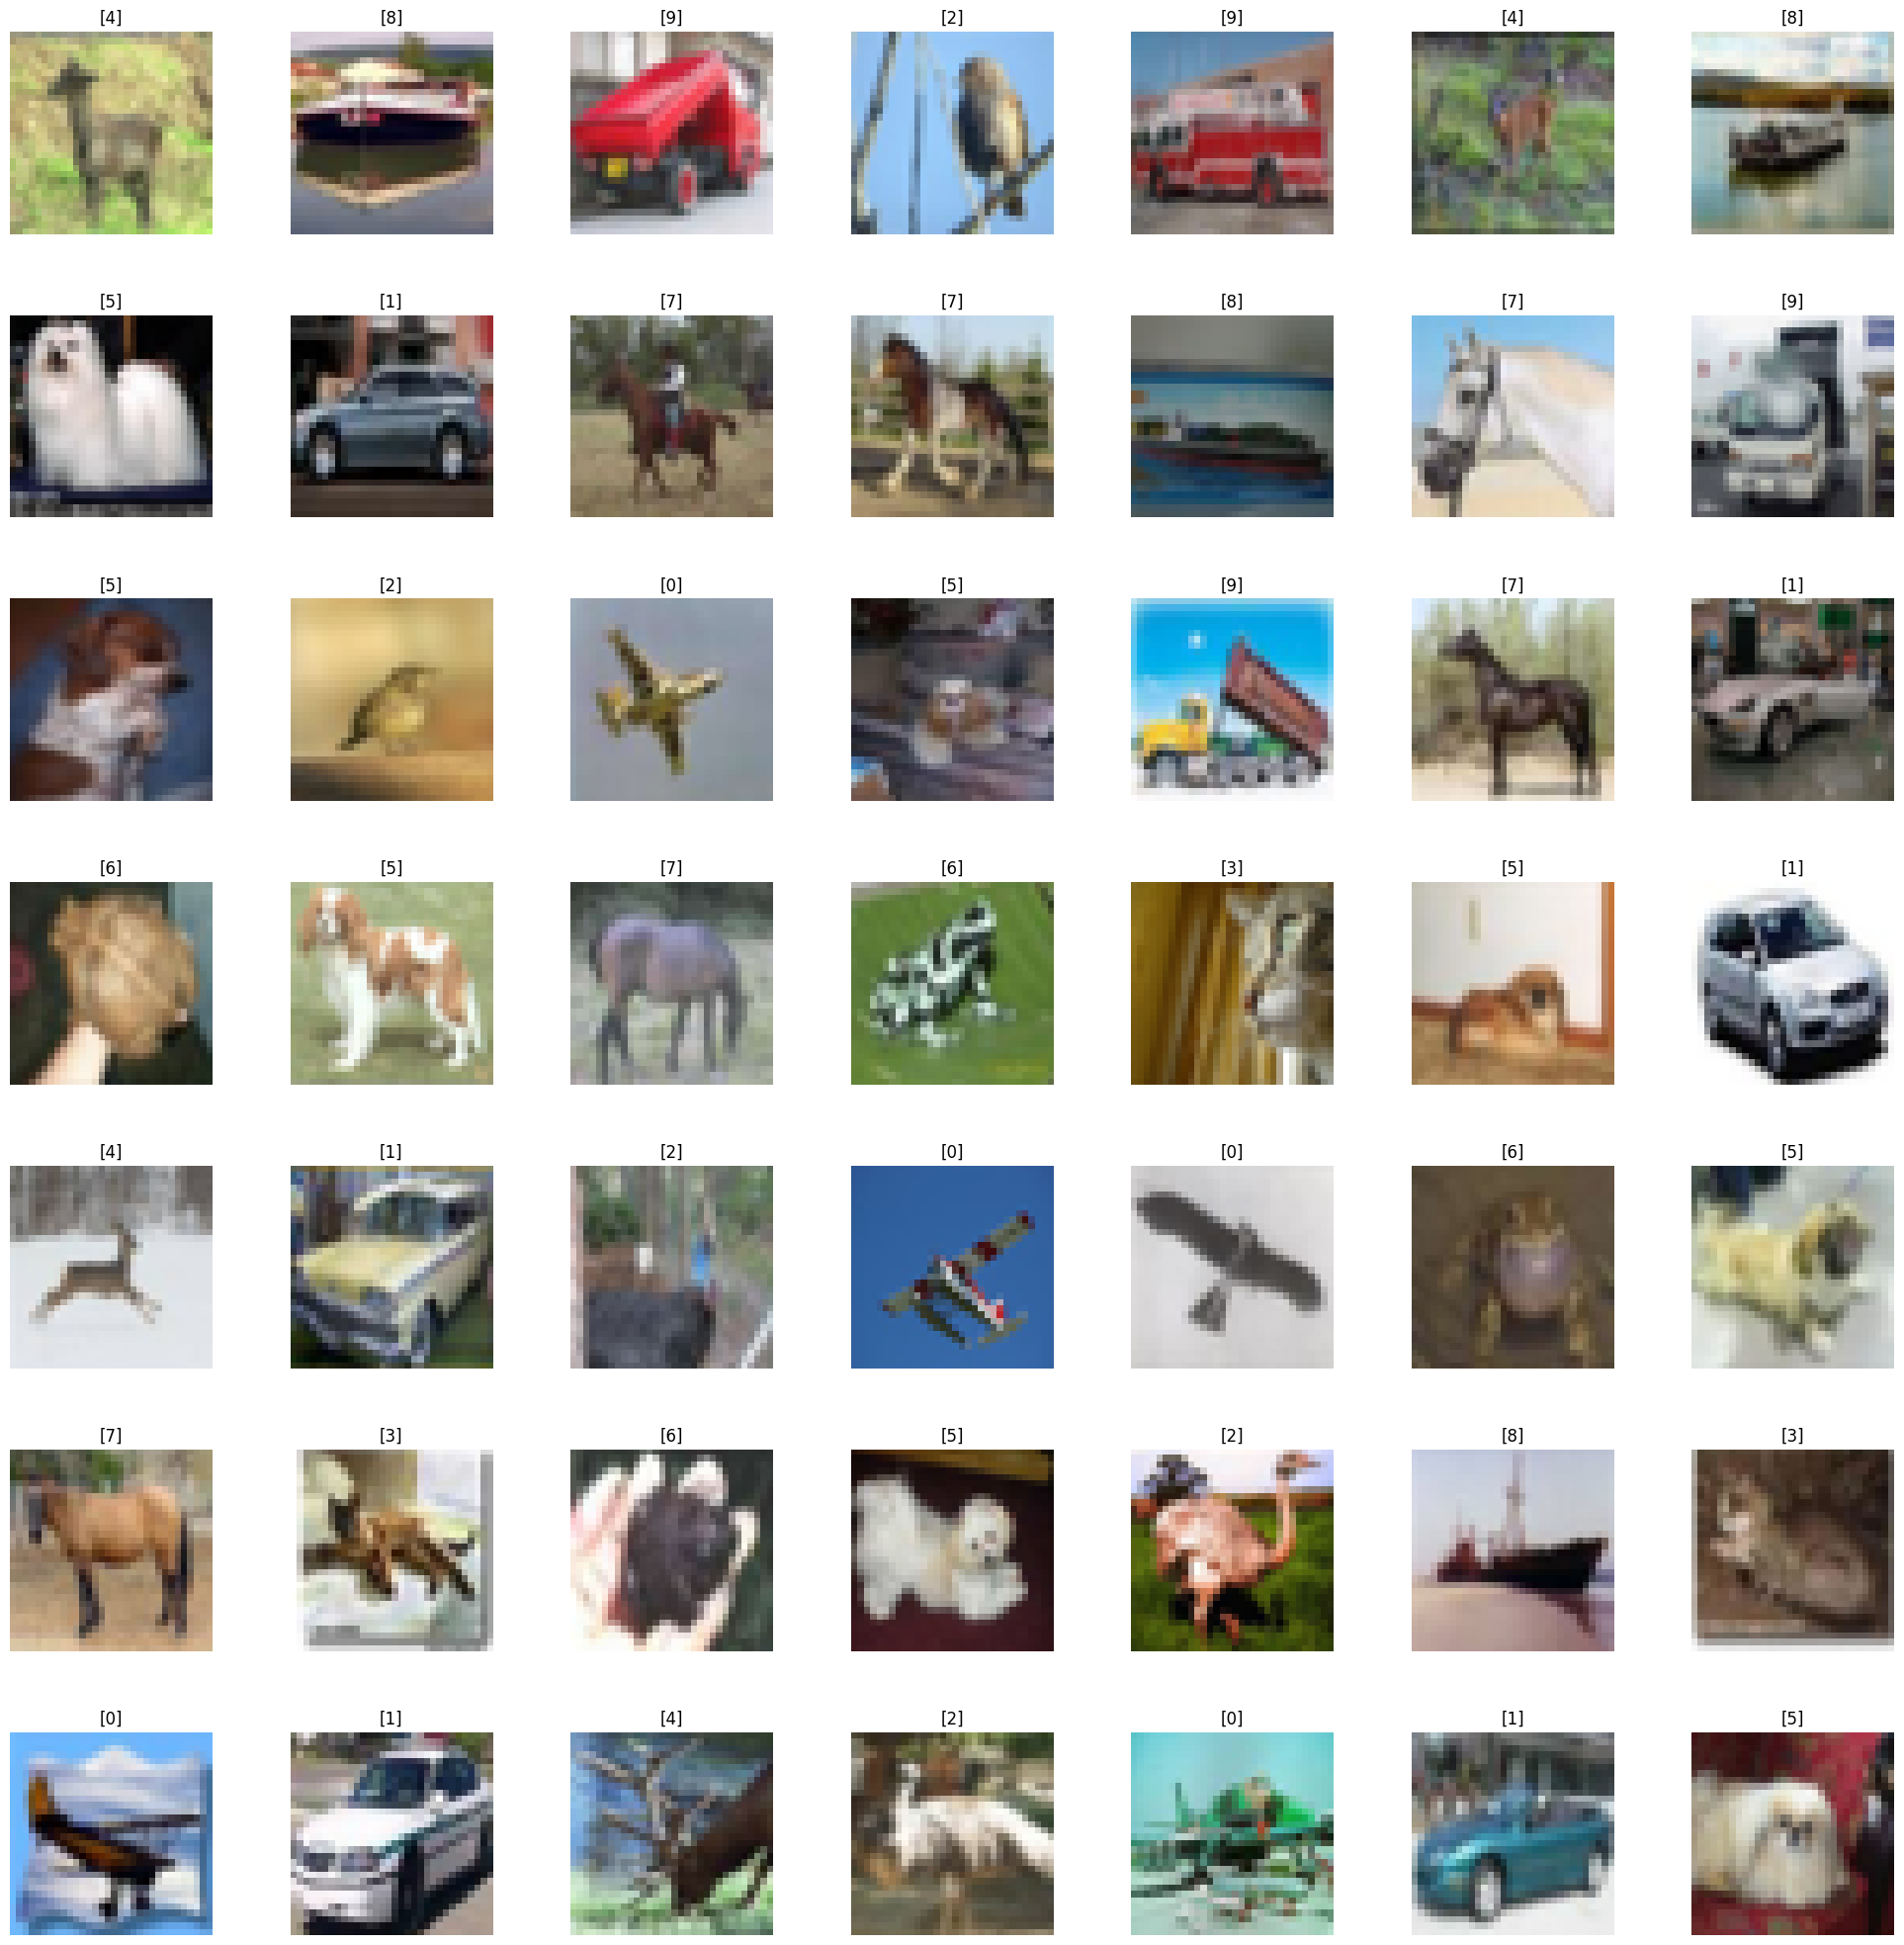

In [35]:
w_grid = 7
l_grid = 7

fig,axes = plt.subplots(l_grid,w_grid,figsize = (25,25))
axes = axes.ravel()

n_training = len(x_train)
for i in np.arange(0,l_grid*w_grid): # creating the array of size 225
    index = np.random.randint(0,n_training)#pick random  number
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index])
    axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)    

Data Preparation

In [6]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [7]:
num_cat = 10

In [8]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [9]:
import keras
y_train = keras.utils.to_categorical(y_train,num_cat)
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [10]:
y_test = keras.utils.to_categorical(y_test,num_cat)
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [11]:
x_train = x_train/255
x_test = x_test/255
x_train
x_test

array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [12]:
x_train.shape

(50000, 32, 32, 3)

In [13]:
Input_shape = x_train.shape[1:]

In [14]:
Input_shape

(32, 32, 3)

Training Model

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [16]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',input_shape = Input_shape,name='conv2d_1'))
cnn_model.add(Conv2D(filters = 32,kernel_size=(3,3),activation='relu',name='conv2d_2'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',name='conv2d_3'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',name='conv2d_4'))
cnn_model.add(MaxPooling2D(2,2))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())

cnn_model.add(Dense(units= 512,activation='relu',name='dense_1'))
cnn_model.add(Dense(units= 512,activation='relu',name='dense_2'))
cnn_model.add(Dense(units=10,activation='softmax',name='output'))



In [17]:
cnn_model.compile(loss = 'categorical_crossentropy',optimizer=keras.optimizers.RMSprop(learning_rate=0.0001),metrics=['accuracy'])

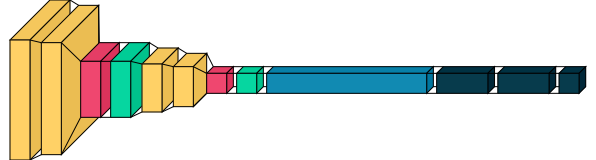

In [19]:
import visualkeras as vk
vk.layered_view(cnn_model)

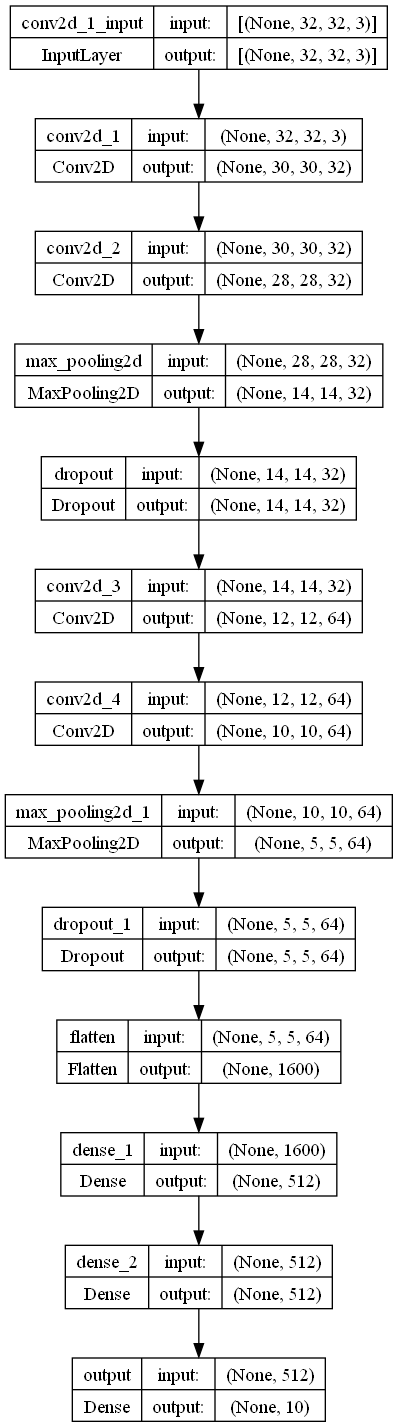

In [20]:
from tensorflow.keras.utils import plot_model
import pydot
from PIL import Image
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)


In [21]:
history = cnn_model.fit(x_train,y_train,batch_size=32,epochs=10,shuffle = True)

Epoch 1/10


1563/1563 [==============================] - 50s 32ms/step - loss: 1.8167 - accuracy: 0.3338
Epoch 2/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.4672 - accuracy: 0.4682
Epoch 3/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.3272 - accuracy: 0.5254
Epoch 4/10
1563/1563 [==============================] - 49s 31ms/step - loss: 1.2189 - accuracy: 0.5667
Epoch 5/10
1563/1563 [==============================] - 50s 32ms/step - loss: 1.1348 - accuracy: 0.5983
Epoch 6/10
1563/1563 [==============================] - 51s 33ms/step - loss: 1.0648 - accuracy: 0.6230
Epoch 7/10
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0061 - accuracy: 0.6451
Epoch 8/10
1563/1563 [==============================] - 52s 33ms/step - loss: 0.9529 - accuracy: 0.6670
Epoch 9/10
1563/1563 [==============================] - 45s 29ms/step - loss: 0.9043 - accuracy: 0.6813
Epoch 10/10
1563/1563 [==============================] - 44s 2

Model Evaluation

In [22]:
evaluation = cnn_model.evaluate(x_test,y_test)
print('Test Accuracy:{}'.format(evaluation[1]))

313/313 [==============================] - 3s 8ms/step - loss: 0.8954 - accuracy: 0.6889
Test Accuracy:0.6888999938964844


In [23]:
predicted_class = cnn_model.predict(x_test)
class_labels = np.argmax(predicted_class, axis=-1)

313/313 [==============================] - 3s 8ms/step


In [24]:
class_labels

array([3, 1, 1, ..., 5, 1, 7], dtype=int64)

In [25]:
y_test = y_test.argmax(1)

In [26]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

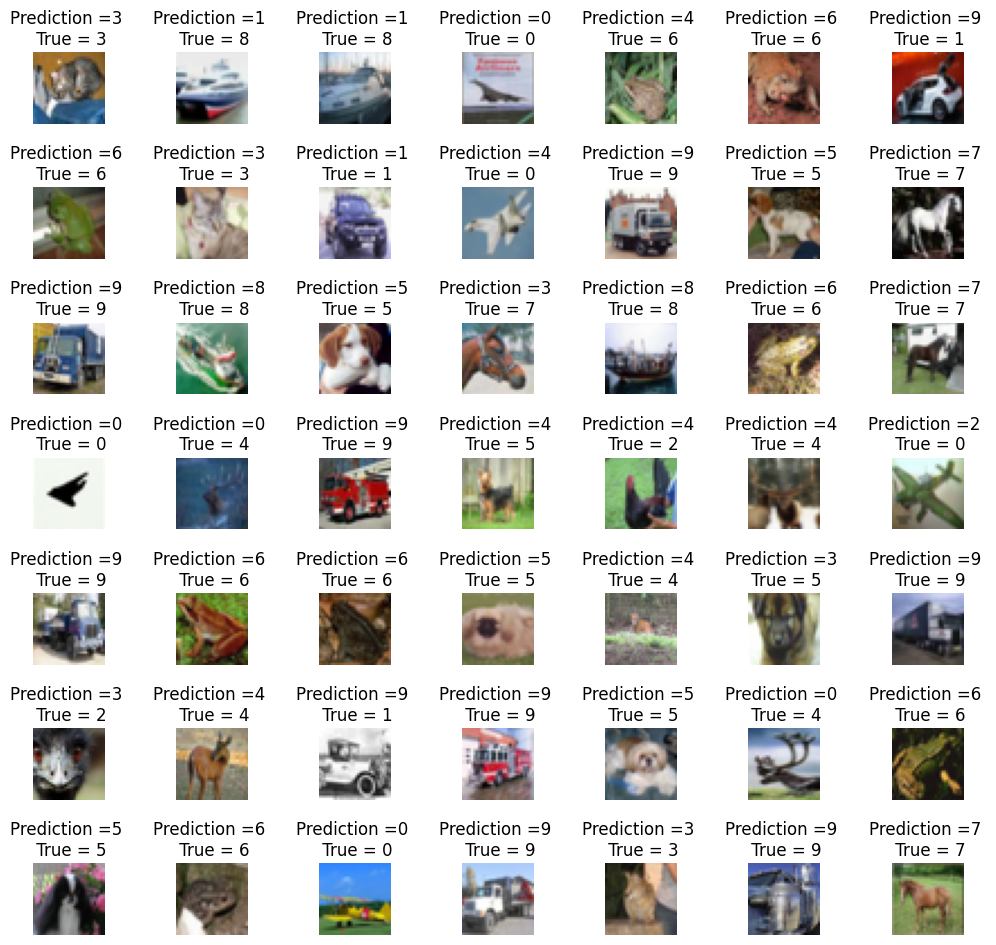

In [27]:
l = 7
w = 7
fig,axes = plt.subplots(l,w,figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0,l*w):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction ={} \n True = {}'.format(class_labels[i],y_test[i]))
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)    

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix
accuracy = accuracy_score(y_test, class_labels)
precision = precision_score(y_test, class_labels, average='weighted')
recall = recall_score(y_test, class_labels, average='weighted')
f1 = f1_score(y_test, class_labels, average='weighted')

# Print the results
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.6889
Precision: 0.6999618377567909
Recall: 0.6889
F1 Score: 0.6847733470519759


<Axes: >

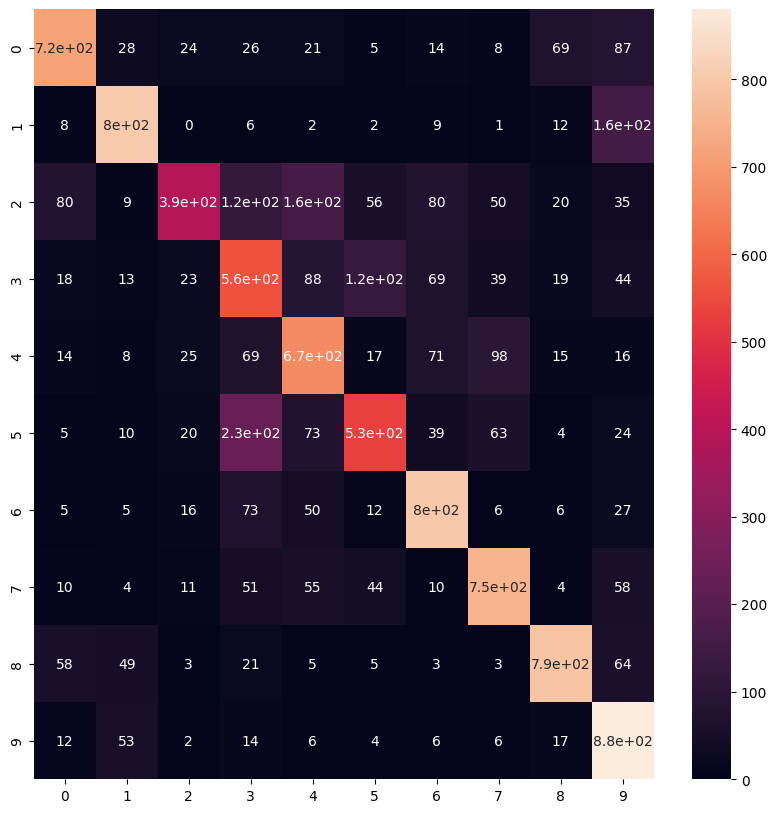

In [29]:
from sklearn.metrics import confusion_matrix 
cm = confusion_matrix(y_test,class_labels)
cm
plt.figure(figsize=(10,10))
sns.heatmap(cm,annot=True)

Saving the MOdel

In [39]:
cnn_model.save('keras_cifar10_trainedmodel.h5')    

In [46]:
from sklearn.metrics import classification_report
report  =  classification_report(y_test,class_labels,target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.77      0.72      0.74      1000
  automobile       0.82      0.80      0.81      1000
       birds       0.76      0.39      0.51      1000
        cats       0.48      0.56      0.52      1000
       deers       0.59      0.67      0.63      1000
        dogs       0.66      0.53      0.59      1000
       frogs       0.73      0.80      0.76      1000
      horses       0.73      0.75      0.74      1000
       ships       0.83      0.79      0.81      1000
      trucks       0.63      0.88      0.74      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000

